In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math 
import pandas as pd 

# Load Data

In [2]:
df = pd.read_csv(filepath_or_buffer='car_price.csv')

In [3]:
current_year = 2025
Age = current_year - df['Year']
df['Age'] = Age

In [13]:
X_train = df[['Age', 'Mileage', 'Engine Size']].to_numpy(dtype=np.float64)
y_train = df['Price'].to_numpy(dtype=np.float64)

In [29]:
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
X_norm = (X_train - mu) / sigma.shape

In [5]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Age
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,10
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684,11
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347,19
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491,10
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
 8   Age           1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


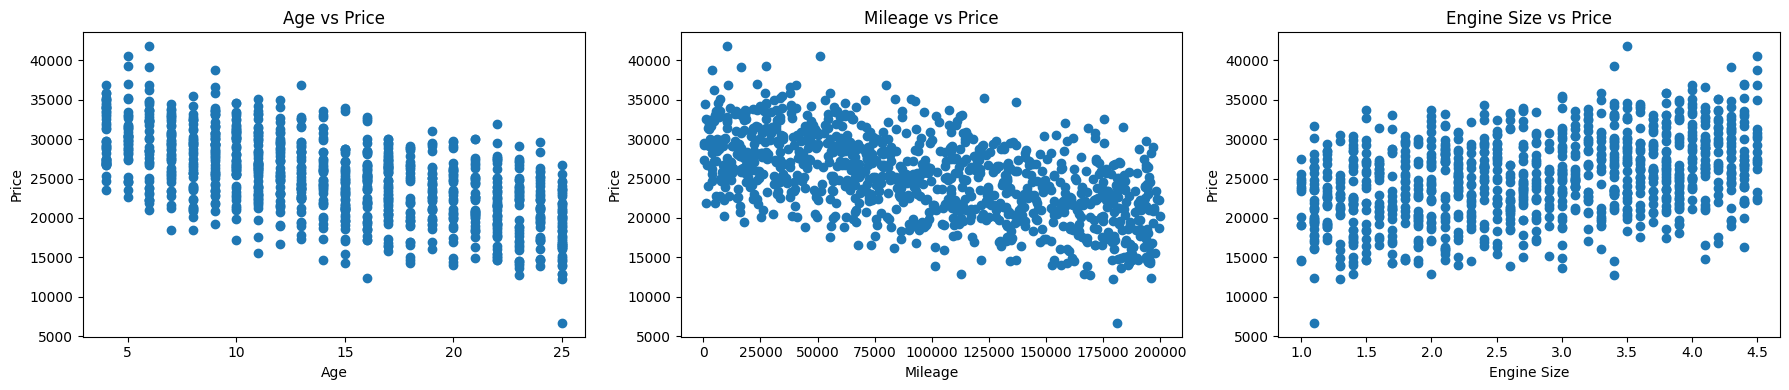

In [16]:
X = X_train

names = ['Age', 'Mileage', 'Engine Size']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for j, ax in enumerate(axes):
    ax.scatter(X[:, j], y_train)
    ax.set_xlabel(names[j])
    ax.set_ylabel('Price')
    ax.set_title(f'{names[j]} vs Price')

plt.tight_layout()
plt.show()

# Cost Function with Regularization

In [25]:
def cost(x, y, w, b, lam):

    m,n = x.shape
    
    f_wb = w @ x.T + b
    err = f_wb - y
    
    cost = np.sum(err ** 2)
    penalty = np.sum(w ** 2)

    total_cost = (1/ (2*m)) * (cost + lam * penalty)

    return total_cost

# Gradient Descent

In [24]:
def gradient(x, y, w, b, lam):

    m,n = x.shape

    f_wb = w @ x.T + b
    err = f_wb - y
    err_sum = np.sum(err)
    
    dj_dw = 1 / m * (np.dot(err_sum, x) + lam * w)
    dj_db = 1 / m * (err_sum)

    return dj_dw, dj_db

In [19]:
def gradient_descent(x, y, w_init, b_init, alpha, lam, num_iters, cost_function, gradient_function): 

    m,n = x.shape
    
    w = w_init
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b, lam)

        tmp_w = w - alpha * dj_dw
        tmp_b = b - b - alpha * dj_db

        w = tmp_w
        b = tmp_b

        if i % 10 == 0:
            J = cost_function(x, y, w, b, lam)
            J_history.append(J)
            print(f"iterations: {J}")

    return w, b, J_history

# Tweak Parameters

In [ ]:
m,n = X_train.shape

w_init = np.zeros(n)
b_init = 0.
lam = 5
alpha = 1e-2
num_iters = 10_000

w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_init, b_init, alpha, lam, num_iters, cost, gradient)

print(f"Optimal w and b: {w_final}, {b_final}")


iterations: 4.861368755471517e+24
iterations: 3.2477632131634014e+48
iterations: 3.2477632318223823e+68
iterations: 3.2477631952509604e+88
iterations: 3.2477633265272266e+108
iterations: 3.2477632590916735e+128
iterations: 3.247763155248655e+148
iterations: 3.247763063245501e+168
iterations: 3.2477633495188736e+188
iterations: 3.247763210473344e+208
iterations: 3.247763287875461e+228
iterations: 3.247763282597532e+248
iterations: 3.2477631118693826e+268
iterations: 3.2477632427969847e+288


C:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


iterations: inf


C:\Users\ACER\AppData\Local\Temp\ipykernel_22904\3841481168.py:8: RuntimeWarning: overflow encountered in square
  cost = np.sum(err ** 2)
C:\Users\ACER\AppData\Local\Temp\ipykernel_22904\3841481168.py:9: RuntimeWarning: overflow encountered in square
  penalty = np.sum(w ** 2)


iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf
iterations: inf


C:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iterations: nan
iteratio

# Plotting

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

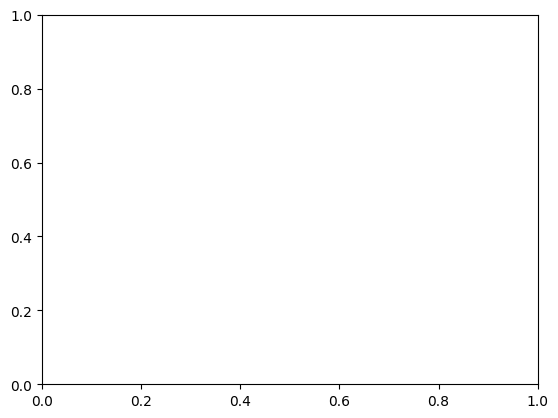

In [31]:
plt.plot(J_history, num_iters)